### 판다스를 활용한 데이터 전처리 연습

- 이 문제를 풀 때 다른 자료를 참고하거나, 구글 검색을 먼저 활용해보시기 바랍니다.   

In [1]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 
# 데이터를 분석할 때 출력해서 확인하기 편함
pd.options.display.max_columns = 100

### 데이터 로딩하기

- 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용

- 여기서 파일의 경로를 지정하는 방법에 주의해야 함. 
    - read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것임
    

**차주정보.csv**

- 자료출처 
- 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집
    - ```차주정보.csv``` 
        - 신용정보원 일반신용정보DB에 등록된 개인(이하 차주)에 대한 인구통계 관련 정보를 제공
        - 컬럼 정보
            - 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
            - 생년 : 차주 출생년도
                - 샘플링 시점 80세 이상은 '80세의 생년'으로 묶음
                - 샘플링 시점 19세 이하는 '19세의 생년'으로 묶음)
            - 성별 : 1.남성, 2: 여성


In [6]:
# 데이터 읽어오기
raw_data = pd.read_csv("data/차주정보.csv")

1. raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력하시오
    - 출력은 (row, column) 으로 표시됩니다

In [7]:
raw_data.shape

(50, 4)

2. raw_data의 처음과 마지막 5행씩을 출력하시오

In [8]:
raw_data.head()
raw_data.tail()

,strd_yymm,deto_id,bth_yr,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1


,strd_yymm,deto_id,bth_yr,sex_cd
45,202010,X0456268139651732219,1950,2
46,202010,X0471166329698944221,1956,1
47,202010,X0472554518406992051,1982,2
48,202010,X0473756250702972881,1958,2
49,202010,X0474444465014724107,1967,1


3. raw_data의 컬럼명과 index 명을 확인하시오.

In [9]:
raw_data.index
raw_data.columns

RangeIndex(start=0, stop=50, step=1)

Index(['strd_yymm', 'deto_id', 'bth_yr', 'sex_cd'], dtype='object')

4. 1번에서 확인한 컬럼명을 아래와 같이 수정하고 데이터를 출력하여 수정된사항을 확인하시오
- strd_yymm : 수집년월
- deto_id : 사용자ID
- bth_yr : 생년

In [10]:
raw_data.rename(columns={'strd_yymm':'수집년월',
                         'deto_id' : '사용자ID',
                         'bth_yr' : '생년'},inplace=True)

In [11]:
raw_data.head(1)

,수집년월,사용자ID,생년,sex_cd
0,202010,X0010254691714933659,1990,1


5. 3번에서 확인한 인덱스를 1부터 50 까지의 정수로 수정하고 데이터를 출력하여 확인하시오


In [15]:
raw_data.index = [i for i in range(1,51)]

In [16]:
raw_data.head()
raw_data.tail()

,수집년월,사용자ID,생년,sex_cd
1,202010,X0010254691714933659,1990,1
2,202010,X0013455316779233219,1954,2
3,202010,X0019385710745765957,1977,1
4,202010,X0019442830801994941,1992,1
5,202010,X0032015350750301834,1968,1


,수집년월,사용자ID,생년,sex_cd
46,202010,X0456268139651732219,1950,2
47,202010,X0471166329698944221,1956,1
48,202010,X0472554518406992051,1982,2
49,202010,X0473756250702972881,1958,2
50,202010,X0474444465014724107,1967,1


6. 출생년도를 4개의 카테고리로 분류하여 연령대 필드를 생성하시오. 
- (청년(19에서 29세); 중년(30에서 49세); 장년(50에서 64세); 노년(65세 이상))
- 2020년 나이를 기준으로 경계(bins)는 직접 설정 하시오

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수집년월    50 non-null     int64 
 1   사용자ID   50 non-null     object
 2   생년      50 non-null     int64 
 3   sex_cd  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [18]:
bins = [1938,1956,1972,1992,2002]
labels = ['노년','장년','중년','청년']
raw_data['연령대']=pd.cut(raw_data['생년'],bins,labels=labels)

In [19]:
raw_data.head()

,수집년월,사용자ID,생년,sex_cd,연령대
1,202010,X0010254691714933659,1990,1,중년
2,202010,X0013455316779233219,1954,2,노년
3,202010,X0019385710745765957,1977,1,중년
4,202010,X0019442830801994941,1992,1,중년
5,202010,X0032015350750301834,1968,1,장년


7. raw_data의 성별필드를 추가하되 sex_cd 필드의 값이 1이면 M, 2면 F 로 값을 정하고 출력하여 결과를 확인하시오


In [20]:
raw_data['성별']=['남' if i==1 else '여' for i in raw_data['sex_cd']]
raw_data.head(1)

,수집년월,사용자ID,생년,sex_cd,연령대,성별
1,202010,X0010254691714933659,1990,1,중년,남


8. sex_cd 열을 삭제하시오.

In [21]:
del raw_data['sex_cd']

In [22]:
raw_data.head()

,수집년월,사용자ID,생년,연령대,성별
1,202010,X0010254691714933659,1990,중년,남
2,202010,X0013455316779233219,1954,노년,여
3,202010,X0019385710745765957,1977,중년,남
4,202010,X0019442830801994941,1992,중년,남
5,202010,X0032015350750301834,1968,장년,남


**카드개설정보.csv**

- 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집
- ```카드개설정보.csv``` 
    - 여기에는 카드개설 관련정보를 카드 개설 기간동안 월말 스냅샷 형태로 제공
    - 컬럼 정보는 다음과 같다.
        - 기준년월 : 해당 데이터 수집 시점
        - 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
        - 기관일련번호 : 카드개설정보와 대출.연체정보를 금융회사 단위로 결합하기 위한 key
        - 개설사유코드 : 0081:신용카드, 0083: 신용체크카드
        - 카드유형코드 : 1.개인카드, 2개인기업카드
        - 개설년월 : 카드 개설정보가 등록된 년월(YYYYMM)



In [25]:
# 데이터 읽어오기
raw_data_open=pd.read_csv('data/카드개설정보.csv')

6. raw_data_open 데이터프레임의 필드수와 컬럼수를 확인하시오.

In [27]:
raw_data_open.shape

(97320, 7)

7. raw_data_open 데이터프레임의 앞부분 레코드 5개 뒷부분 레코드 5개를 확인하시오.

In [28]:
raw_data_open.head()
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
0,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
1,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
2,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
3,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
4,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97315,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97316,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97317,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97318,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97319,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


8. raw_data_open df의 index를 숫자 1~전체행수 로 설정하시오.

In [29]:
raw_data_open.index=[i for i in range(1,len(raw_data_open)+1)]

In [30]:
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97320,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


9. raw_data_open df의 컬럼명을 아래와 같이 변경하시오.
- strd_yymm : 수집년월
- card_open_strd_yymm : 1차수집년월
- deto_id : 사용자ID
- inst_id : 금융기관ID  
- card_open_yymm : 개설년월

In [31]:
raw_data_open.rename(columns={'strd_yymm':'수집년월',
                              'card_open_strd_yymm': '1차수집년월',
                              'deto_id' : '사용자ID',
                              'inst_id' : '금융기관ID',
                              'card_open_yymm' : '개설년월'},inplace=True)

In [32]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


In [33]:
raw_data_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.9+ MB


In [35]:
raw_data_open['개설년월']
# 정수형

1        201312
2        200006
3        201107
4        201511
5        201312
          ...  
97316    200701
97317    201306
97318    201012
97319    201101
97320    200701
Name: 개설년월, Length: 97320, dtype: int64

10. 카드개설년월필드에 대해서 카드개설연도 카드개설월로 필드를 분리하시오

In [34]:
raw_data_open['카드개설연도']=[int(str(i)[0:4]) for i in raw_data_open['개설년월']]

In [35]:
raw_data_open['카드개설월'] = [int(str(i)[4:6]) for i in raw_data_open['개설년월']]

In [36]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12


11. card_open_rson_nm 필드는 81이면 신용카드 83이면 신용체크카드를 의미한다 
- 개설유형 필드를 새로 생성하고 해당 코드에 맞는 유형으로 데이터를 변환하시오


In [37]:
raw_data_open['개설유형']=['신용카드' if i == 81 else '신용체크카드'
                            for i in raw_data_open['card_open_rson_nm']
                            ]

In [38]:
raw_data_open.head(2)

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드


12. card_typ_nm 필드는 개인카드(1)인지 개인기업카드(2)인지를 나타낸다
- 카드유형 필드를 새로 추가하고 card_typ_nm 값에 따라 개인/기업으로 나타내시오

In [41]:
raw_data_open['카드유형']=['개인' if i == 1 else '기업'
                            for i in raw_data_open['card_typ_nm']
                            ]

In [42]:
raw_data_open.head(2)

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드,개인


13. card_typ_nm 필드와 card_open_rson_nm 필드는 제거하시오

In [43]:
del raw_data_open['card_typ_nm']
del raw_data_open['card_open_rson_nm']

In [44]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인


14. 카드개설연도 필드에 대해서 각 연대별로 카테고리를 구분하여 개설연대 필드를 생성하시오.
- 1990년대, 2000년대, 2010년대

In [45]:
bins = [1989,2000,2010,2020]
labels = ['1990년대', '2000년대', '2010년대']
raw_data_open['개설연대']=pd.cut(raw_data_open['카드개설연도'],
                                 bins,labels=labels)

In [46]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인,2010년대
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인,1990년대
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인,2010년대
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인,2010년대
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인,2010년대


15. 카드 개설 df와 차주정보 df를 memberID를 기준으로 병합하여 새로운 df로 저장하고 확인하시오
- inner_join 

In [48]:
raw_data.columns
raw_data_open.columns

Index(['수집년월', '사용자ID', '생년', '연령대', '성별'], dtype='object')

Index(['수집년월', '1차수집년월', '사용자ID', '금융기관ID', '개설년월', '카드개설연도', '카드개설월', '개설유형',
       '카드유형', '개설연대'],
      dtype='object')

In [50]:
fin_data = raw_data.merge(raw_data_open,on='사용자ID')

In [52]:
fin_data.index=[i for i in range(1,len(fin_data)+1)]
fin_data.tail()

,수집년월_x,사용자ID,생년,연령대,성별,수집년월_y,1차수집년월,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
2888,202010,X0474444465014724107,1967,장년,남,202010,201809,Y3307984968389331286,201212,2012,12,신용카드,개인,2010년대
2889,202010,X0474444465014724107,1967,장년,남,202010,201810,Y0892369525171298774,200409,2004,9,신용카드,개인,2000년대
2890,202010,X0474444465014724107,1967,장년,남,202010,201810,Y3307984968389331286,201212,2012,12,신용카드,개인,2010년대
2891,202010,X0474444465014724107,1967,장년,남,202010,201811,Y3307984968389331286,201212,2012,12,신용카드,개인,2010년대
2892,202010,X0474444465014724107,1967,장년,남,202010,201812,Y3307984968389331286,201212,2012,12,신용카드,개인,2010년대


16. 카드 개설 인원을 청년, 중년, 장년, 노년으로 비교할 수 있도록 아래와 같은 그래프로 표현하시오.


In [53]:
y_cate=pd.value_counts(fin_data['연령대'])
y_cate

중년    1217
장년     953
노년     636
청년      86
Name: 연령대, dtype: int64

<AxesSubplot:>

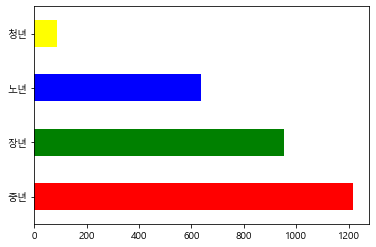

In [54]:
y_cate.plot(kind='barh',color=['red','green','blue','yellow'])

![그래프](문제16.png)

17. 시간의 흐름에 따른 카드 개설 인원의 추이를 확인할 수 있는 아래와 같은 그래프를 표현하시오.


In [58]:
open_count = pd.value_counts(fin_data.개설년월).sort_index()

<Figure size 720x432 with 0 Axes>

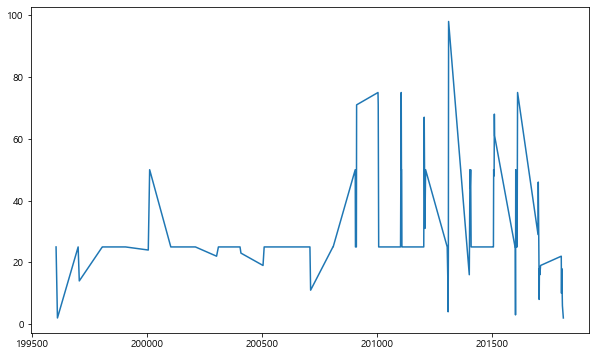

In [59]:
plt.figure(figsize=(10,6))
plt.plot(open_count)
plt.show()

![그래프](문제17.png)

18. fin_data df를 이용하여 각 연대별 발급건수를 표현하는 피봇테이블을 생성하고 해당 테이블을 사용하여 각 연대별 신용카드 발급 추이를 나타내는 아래와 같은 그래프를 그리시오


In [60]:
p_year = pd.pivot_table(fin_data, index=['개설연대'],values=['생년'],aggfunc=len)
p_year

,생년
개설연대,
1990년대,215
2000년대,867
2010년대,1810


<Figure size 720x720 with 0 Axes>

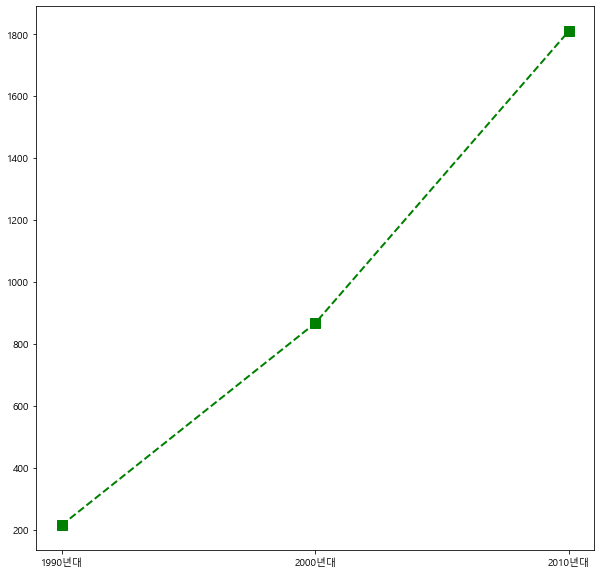

In [61]:
plt.figure(figsize=(10,10))
plt.plot(p_year,lw=2,marker='s',ms=10,c='g',ls='--')
plt.show()

![그래프](문제18.png)

19. 신용카드의 각 연도별 발급건수를 계산하고 연도별 오름차순으로 정렬하시오.
- 결과를 변수에 저장하시오


In [62]:
y_count = fin_data['카드개설연도'].value_counts().sort_index()
y_count

1996     27
1997     39
1998     50
1999     25
2000     74
2001     50
2002     50
2003     47
2004     48
2005     44
2006     75
2007    136
2008     50
2009    196
2010    171
2011    250
2012    223
2013    162
2014    235
2015    377
2016    324
2017    173
2018     66
Name: 카드개설연도, dtype: int64

20. 19번에서 저장한 변수의 데이터를 활용하여 연도별 
- 개설건수에 대하여 아래와 같은 시계열 그래프로 표현하시오.


<Figure size 720x432 with 0 Axes>

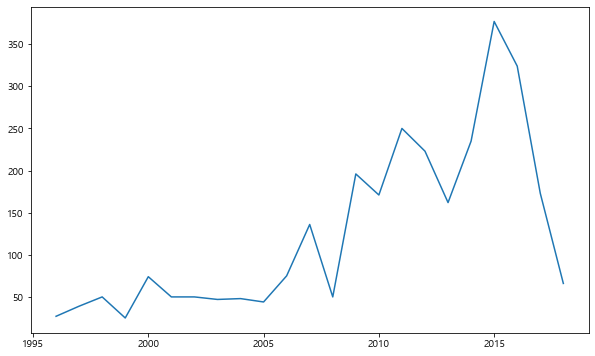

In [64]:
plt.figure(figsize=(10,6))
plt.plot(y_count)

![그래프](문제20.png)

21. 성별,연령대로 그룹화하여 카드 발급 건수를 표현하는 피봇테이블을 작성하고 변수에 저장하시오


In [65]:
c_count=pd.pivot_table(fin_data, index=['성별','연령대'],
                       values=['생년'],aggfunc=len)
c_count # long 형

생년
성별 연령대     
남  노년   182
   장년   200
   중년   704
   청년    50
여  노년   454
   장년   753
   중년   513
   청년    36

In [66]:
s=c_count.unstack(1)
s

생년              
연령대   노년   장년   중년  청년
성별                    
남    182  200  704  50
여    454  753  513  36

In [68]:
s = pd.pivot_table(fin_data, index=['성별'], columns=['연령대'],
                  values=['생년'], aggfunc=len)
s

생년              
연령대   노년   장년   중년  청년
성별                    
남    182  200  704  50
여    454  753  513  36

22. 21번에서 저장한 변수를 이용하여 아래와 같은 그래프를 작성하시오.

In [70]:
s.columns=[
    ['발급건수','발급건수','발급건수','발급건수'],
    ['노년','장년','중년','청년']
]
s

발급건수              
     노년   장년   중년  청년
성별                   
남   182  200  704  50
여   454  753  513  36

<AxesSubplot:xlabel='성별'>

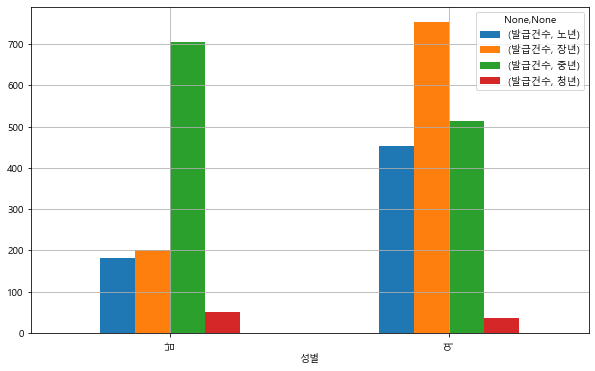

In [71]:
s.plot(kind='bar',grid=True,figsize=(10,6))

![그래프](문제21.png)

<AxesSubplot:xlabel='성별'>

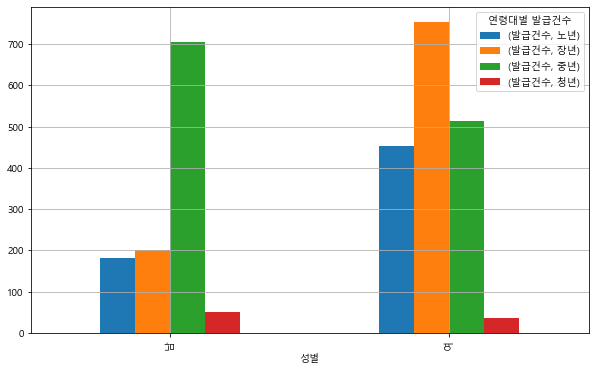

In [72]:
s.plot(kind='bar',grid=True,figsize=(10,6))
plt.legend(title='연령대별 발급건수')